# Sprint 8

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import scipy.cluster.hierarchy as shc
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
Facebook_Thai = pd.read_csv('C:\\Juan\\ITAcademy\\Sprint_8\\Publicacions Facebook Thailandia.csv')

- Exploro y preparo mi set de datos. 

In [2]:
Facebook_Thai.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
Facebook_Thai.shape

(7050, 16)

In [4]:
Facebook_Thai.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [5]:
Facebook_Thai.duplicated().sum()

51

In [6]:
Facebook_Thai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [7]:
Facebook_Thai.nunique()

status_id           6997
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
Column1                0
Column2                0
Column3                0
Column4                0
dtype: int64

- Borro las columnas 12 a 15 porque no contienen información, sólo Nans.  

In [8]:
Face_Thai = Facebook_Thai.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1)

- Tengo 51 filas duplicadas que también elimino. 

In [9]:
Face_Thai = Face_Thai.drop_duplicates()

In [10]:
Face_Thai.shape

(6999, 12)

- Según nunique() tengo 6997 status_id diferentes, no 6999 que obtengo después de borrar duplicados, es decir existen dos status_id que se repiten, salvo en alguna columna, pero que no han sido identificados. Los busco. 

In [11]:
Face_Thai[Face_Thai['status_id'].duplicated() == True]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
1698,246675545449582_326883450762124,photo,10/11/2013 8:23,211,2,0,211,0,0,0,0,0
1729,246675545449582_429583263825475,photo,9/11/2013 0:12,537,16,1,537,0,0,0,0,0


In [12]:
Face_Thai[Face_Thai.status_id == '246675545449582_326883450762124']

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
1488,246675545449582_326883450762124,photo,2/14/2014 3:07,211,2,0,211,0,0,0,0,0
1698,246675545449582_326883450762124,photo,10/11/2013 8:23,211,2,0,211,0,0,0,0,0


In [13]:
Face_Thai[Face_Thai.status_id == '246675545449582_429583263825475']

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
1408,246675545449582_429583263825475,photo,4/22/2014 5:43,537,16,1,537,0,0,0,0,0
1729,246675545449582_429583263825475,photo,9/11/2013 0:12,537,16,1,537,0,0,0,0,0


- Estos dos IDs sólo cambian por su "status_published", el resto de información es igual por lo que no nos aportan información relevante. Los elimino también. 

In [14]:
Face_Thai = Face_Thai.drop_duplicates(subset='status_id', keep='last')
Face_Thai.shape

(6997, 12)

[Text(0.5, 0, 'Status Type'), Text(0, 0.5, 'Conteo')]

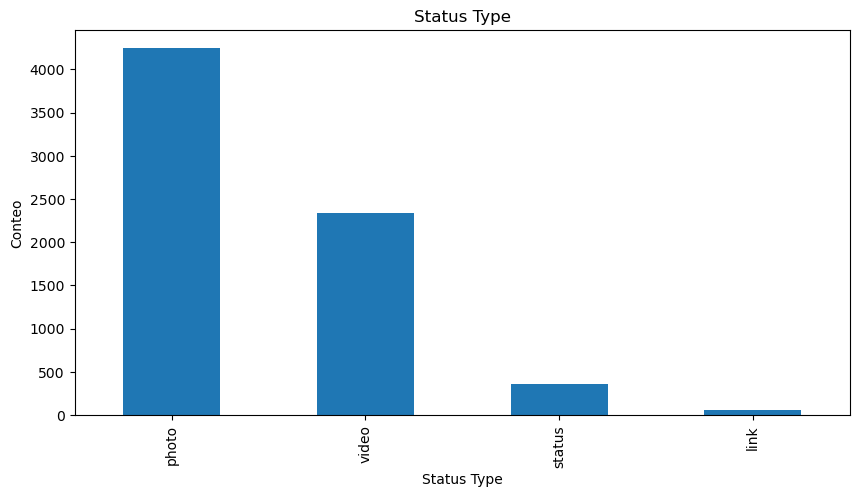

In [15]:
st_ax = Face_Thai.status_type.value_counts().plot(kind='bar',
                                        figsize=(10,5),
                                        title="Status Type")
st_ax.set(xlabel="Status Type", ylabel="Conteo")

- La mayoría de vendedores usan foto o video como estado/medio para sus ventas. Una pequeña proporción de los usuarios usan text-status o URL/link para poner un anuncio promocional.

In [16]:
round(Face_Thai.describe(),3)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6997.000,6997.000,6997.000,6997.000,6997.000,6997.000,6997.000,6997.000,6997.000
mean,224.952,225.614,40.270,209.900,12.755,1.253,0.698,0.233,0.110
std,452.930,892.863,132.064,439.596,40.112,8.727,3.971,1.481,0.689
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,17.000,0.000,0.000,17.000,0.000,0.000,0.000,0.000,0.000
50%,58.000,4.000,0.000,57.000,0.000,0.000,0.000,0.000,0.000
75%,216.000,22.000,4.000,182.000,3.000,0.000,0.000,0.000,0.000
max,4710.000,20990.000,3424.000,4710.000,657.000,278.000,157.000,51.000,31.000


- Al parecer 'num_reactions' es la suma de num_likes, loves, wows, hahas, sads y angrys. Lo verifico en todas las filas. 

In [17]:
Face_Thai['conteo reacciones'] = Face_Thai.iloc[:,-6:].sum(axis=1)
Face_Thai['emparejar reacciones'] = Face_Thai.apply(lambda x: 1 if x['num_reactions'] == x['conteo reacciones'] else 0, axis=1)

In [18]:
Face_Thai[Face_Thai['emparejar reacciones']==0]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,conteo reacciones,emparejar reacciones
238,246675545449582_1331955210254938,video,6/25/2017 7:42,885,462,26,659,220,0,2,0,0,881,0
247,246675545449582_1320853268031799,photo,6/13/2017 23:17,264,2,0,256,2,5,0,0,0,263,0
248,246675545449582_1319907678126358,photo,6/13/2017 1:31,313,3,0,297,7,6,0,0,0,310,0
251,246675545449582_1319045328212593,photo,6/12/2017 5:08,247,6,0,234,9,1,0,0,0,244,0
253,246675545449582_1318160668301059,photo,6/11/2017 7:04,387,3,0,368,16,1,0,0,0,385,0
254,246675545449582_1317164368400689,photo,6/10/2017 8:19,178,9,0,170,6,0,0,0,0,176,0
256,246675545449582_1316848781765581,photo,6/10/2017 1:08,270,3,0,256,10,3,0,0,0,269,0
257,246675545449582_1315331711917288,photo,6/8/2017 9:26,351,4,1,344,6,0,0,0,0,350,0
293,246675545449582_1262985247151935,video,4/20/2017 2:36,616,523,21,459,125,21,8,0,1,614,0


- Existen 9 observaciones donde la suma de las reacciones no es igual a 'num_reactions'. Como las diferencias son muy pequeñas y tanto las reacciones como su suma se quedan dentro de los valores estadísticos que los describen (al aplicar la suma correcta), voy a sustituir num_reactions con los valores de la suma correcta.   

In [19]:
Face_Thai['num_reactions']=Face_Thai['conteo reacciones']

- Ahora voy a eliminar las columnas que no me son útiles para hacer el PCA (status_id y status_published) así como las columnas que he creado (conteo reacciones y emparejar reacciones) para aplicar el K-means. 

In [20]:
Thai = Face_Thai.drop(['status_id','status_published','conteo reacciones','emparejar reacciones',], axis=1)

## Ejercicio 1
Clasificación de los registros con K-means

- Declaro el vector y la variable objetivo

In [21]:
Xkm = Thai
ykm = Thai['status_type']
Xkm.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


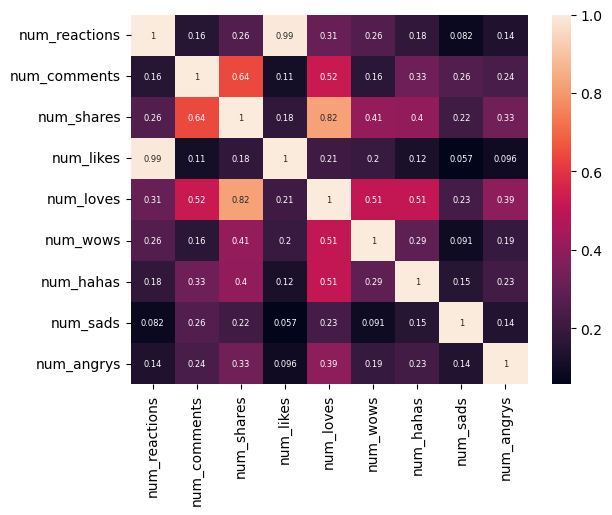

In [22]:
sns.heatmap(Xkm.corr(),annot = True, annot_kws = {'size': 6})
plt.show()

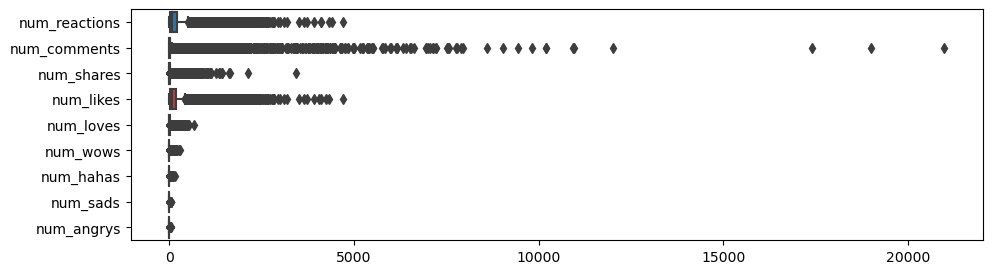

In [23]:
fig, ax = plt.subplots(figsize = (11, 3))
sns.boxplot(data = Xkm,orient='h')
plt.show()

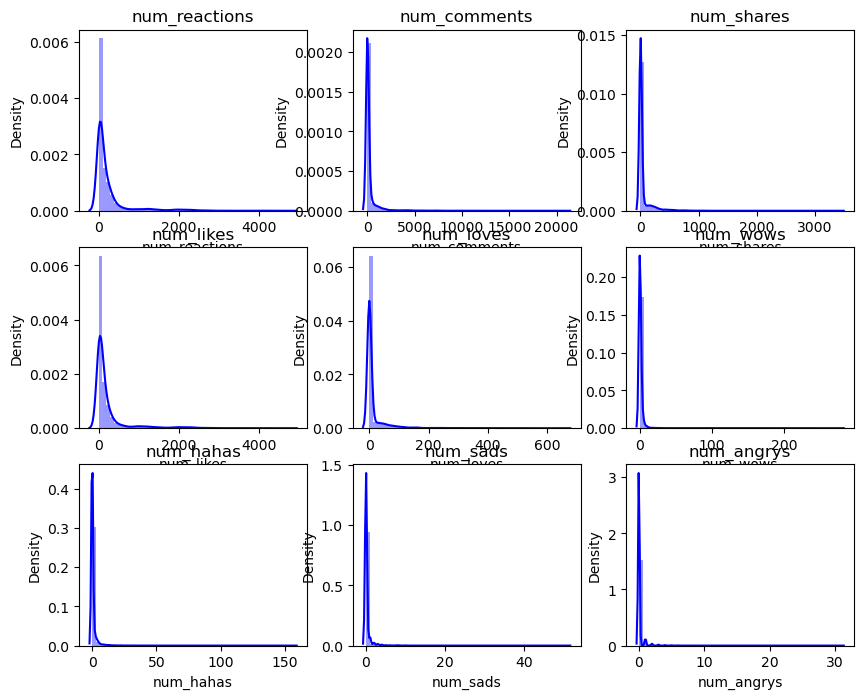

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))
sns.distplot(Xkm.num_reactions, ax=axes[0,0],color= 'b').set_title("num_reactions")
sns.distplot(Xkm.num_comments, ax=axes[0,1],color= 'b').set_title("num_comments")
sns.distplot(Xkm.num_shares, ax=axes[0,2],color= 'b').set_title("num_shares")
sns.distplot(Xkm.num_likes, ax=axes[1,0],color= 'b').set_title("num_likes")
sns.distplot(Xkm.num_loves, ax=axes[1,1],color= 'b').set_title("num_loves")
sns.distplot(Xkm.num_wows, ax=axes[1,2],color= 'b').set_title("num_wows")
sns.distplot(Xkm.num_hahas, ax=axes[2,0],color= 'b').set_title("num_hahas")
sns.distplot(Xkm.num_sads, ax=axes[2,1],color= 'b').set_title("num_sads")
sns.distplot(Xkm.num_angrys, ax=axes[2,2],color= 'b').set_title("num_angrys")
plt.show()

- Ninguna variable se distribuye como normal, están todas sesgadas a la izquierda, la correlación con la variable objetivo es baja y tienen muchos outliers, al parecer la gran mayoría de los status provocan pocas reacciones y el resto provoca muchas. 
- Como k-means se ha de escalar, aplicaré el robust scaler dadas las distribuciones y los datos atípicos de las variables. 

- Transformo la variable objetivo a escalar

In [25]:
le = LabelEncoder()
Xkm['status_type'] = le.fit_transform(Xkm['status_type'])
ykm = le.transform(ykm)
Xkm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6997 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    6997 non-null   int32
 1   num_reactions  6997 non-null   int64
 2   num_comments   6997 non-null   int64
 3   num_shares     6997 non-null   int64
 4   num_likes      6997 non-null   int64
 5   num_loves      6997 non-null   int64
 6   num_wows       6997 non-null   int64
 7   num_hahas      6997 non-null   int64
 8   num_sads       6997 non-null   int64
 9   num_angrys     6997 non-null   int64
dtypes: int32(1), int64(9)
memory usage: 574.0 KB


In [26]:
Xkm.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


- Escalo Xkm con robust scaler para igualar escalas, de otra forma las variables con mayor magnitud (reacciones, comentarios, shares y likes) podrían sesgar el modelo. 

In [27]:
cols = ['status_type','num_reactions','num_comments','num_shares','num_likes','num_loves',
        'num_wows','num_hahas','num_sads','num_angrys']
rs = RobustScaler()
XkmT = rs.fit_transform(Xkm)
XkmT = pd.DataFrame(XkmT, columns=cols)
XkmT.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0
1,0.0,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0
2,1.0,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0
3,0.0,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0


- Aplico el K-Means con dos clusters

In [28]:
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(XkmT)

  File "C:\Users\MM\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


KMeans(n_clusters=2, random_state=0)

In [29]:
pd.Series(kmeans.labels_).value_counts()

0    6689
1     308
dtype: int64

In [30]:
kmeans.cluster_centers_

array([[3.25160712e-01, 7.33156739e-01, 3.64824203e+00, 4.76651966e+00,
        8.39514898e-01, 2.38934569e+00, 6.21916579e-01, 3.67917476e-01,
        1.53984153e-01, 6.63776349e-02],
       [9.93506494e-01, 3.13631469e+00, 1.49611128e+02, 1.25191558e+02,
        2.81936246e+00, 4.46980519e+01, 1.49642857e+01, 7.87012987e+00,
        1.94155844e+00, 1.06168831e+00]])

In [31]:
kmeans.inertia_

9997628.601815982

- Una inertia muy alta

In [32]:
kmeans.n_iter_

8

In [33]:
labels = kmeans.labels_
correct_labels = sum(ykm == labels)
print("Resultado: %d de %d muestras han sido correctamente etiquetadas." % (correct_labels, ykm.size))

Resultado: 65 de 6997 muestras han sido correctamente etiquetadas.


In [34]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(ykm.size)))

Accuracy score: 0.01


- Hemos obtenido una exactitud pobre del 1% con nuestro modelo. 


- Busco k óptima con el método Elbow

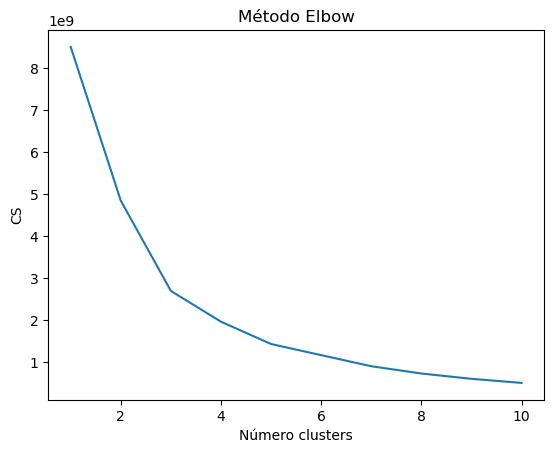

In [35]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(Xkm)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('Método Elbow')
plt.xlabel('Número clusters')
plt.ylabel('CS')
plt.show()

- En este caso el método Elbow arroja 2 codos, k=2 y k=3 como ks óptimas. El codo en 3 es más pronunciado. 
- Ejecuto el modelo con 3 clusters. 

In [36]:
kmeans3 = KMeans(n_clusters=3, random_state=0)
kmeans3.fit(XkmT)
labels = kmeans3.labels_
correct_labels = sum(ykm == labels)
print("Resultado: %d de %d muestras han sido correctamente etiquetadas." % (correct_labels, ykm.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(ykm.size)))

Resultado: 4239 de 6997 muestras han sido correctamente etiquetadas.
Accuracy score: 0.61


- La máxima accuracy la obtenemos con 3 clusters, 61%. La k óptima es 3 con una exactitud aceptable, sobre todo teniendo en cuenta la poca correlación que tiene la variable objetivo con el resto de variables.  

In [37]:
pd.Series(kmeans3.labels_).value_counts()

1    6379
0     515
2     103
dtype: int64

Predicciones

In [38]:
preds = kmeans3.labels_
kmeans_df = pd.DataFrame(Xkm)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,KMeans_Clusters
0,3,529,512,262,432,92,3,1,1,0,0
1,1,150,0,0,150,0,0,0,0,0,1
2,3,227,236,57,204,21,1,1,0,0,1
3,1,111,0,0,111,0,0,0,0,0,1
4,1,213,0,0,204,9,0,0,0,0,1


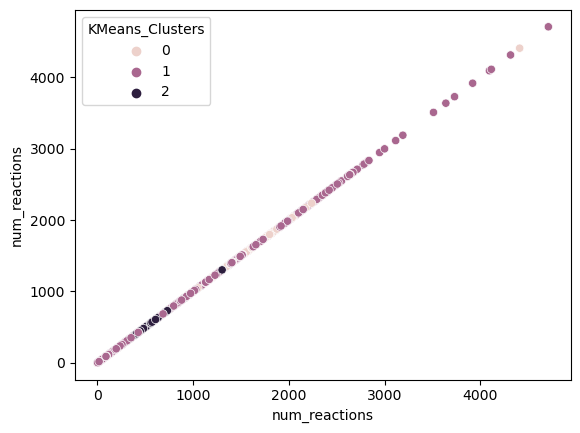

In [39]:
sns.scatterplot(x=kmeans_df['num_reactions'],y=kmeans_df['num_reactions'],hue='KMeans_Clusters',data=kmeans_df) 
plt.show()

- La agrupación de la variable num_reactions no es muy clara, sobre todo para el cluster 0.  

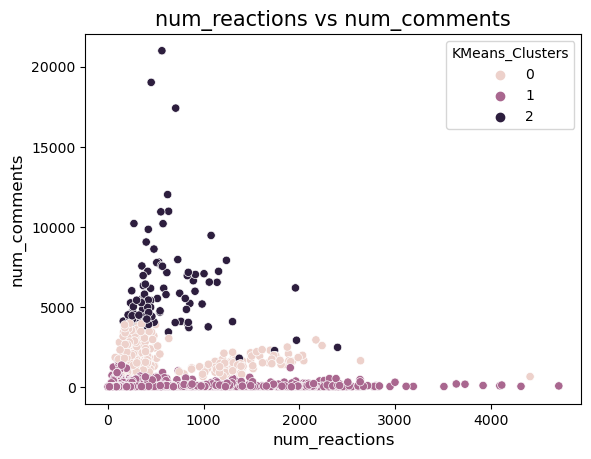

In [40]:
sns.scatterplot(x=kmeans_df['num_reactions'],y=kmeans_df['num_comments'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("num_reactions vs num_comments", fontsize=15)
plt.xlabel("num_reactions", fontsize=12)
plt.ylabel("num_comments", fontsize=12)
plt.show()

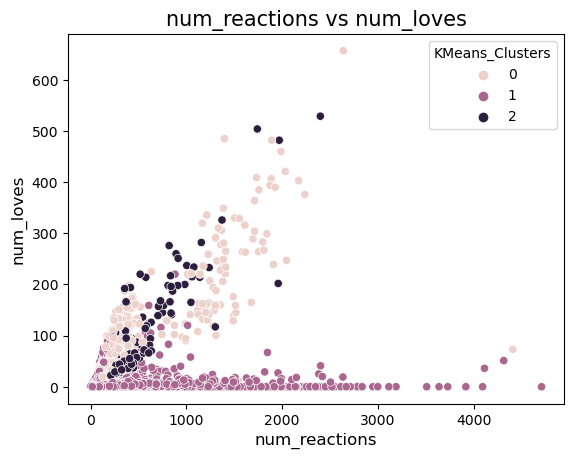

In [41]:
sns.scatterplot(x=kmeans_df['num_reactions'],y=kmeans_df['num_loves'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("num_reactions vs num_loves", fontsize=15)
plt.xlabel("num_reactions", fontsize=12)
plt.ylabel("num_loves", fontsize=12)
plt.show()

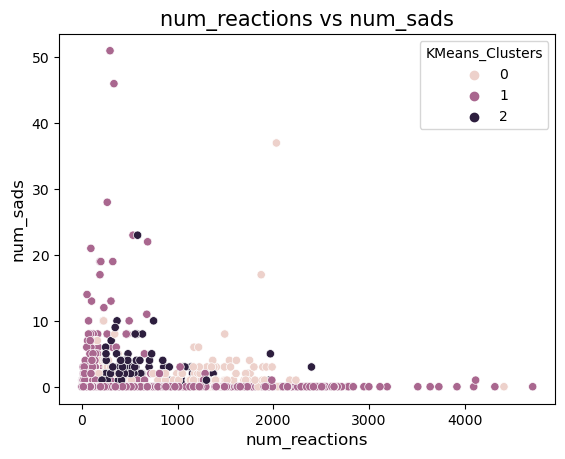

In [42]:
sns.scatterplot(x=kmeans_df['num_reactions'],y=kmeans_df['num_sads'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("num_reactions vs num_sads", fontsize=15)
plt.xlabel("num_reactions", fontsize=12)
plt.ylabel("num_sads", fontsize=12)
plt.show()

- Las variables están bien agrupadas dentro de los clusters 1 y 2, el cluster 0 se confunde un poco.  
- Viendo estos gráficos podemos identificar algunos nombres de clusters. Por ejemplo, cluster 2: altos comentarios y reacciones, cluster 1: reacciones y comentarios medios y cluster 0: bajos comentarios (reacciones en todo el rango) 
- La observación 2 que corresponde a video pertenece al cluster 1, reacciones y comentarios medios. Así podemos clasificar todas las observaciones.    

## Ejercicio 2
Clasificación con clustering jerárquico. 

- Usaré un clustering jerárquico acumulativo. Primero veo el dendograma para decidir los clusters óptimos del modelo. 

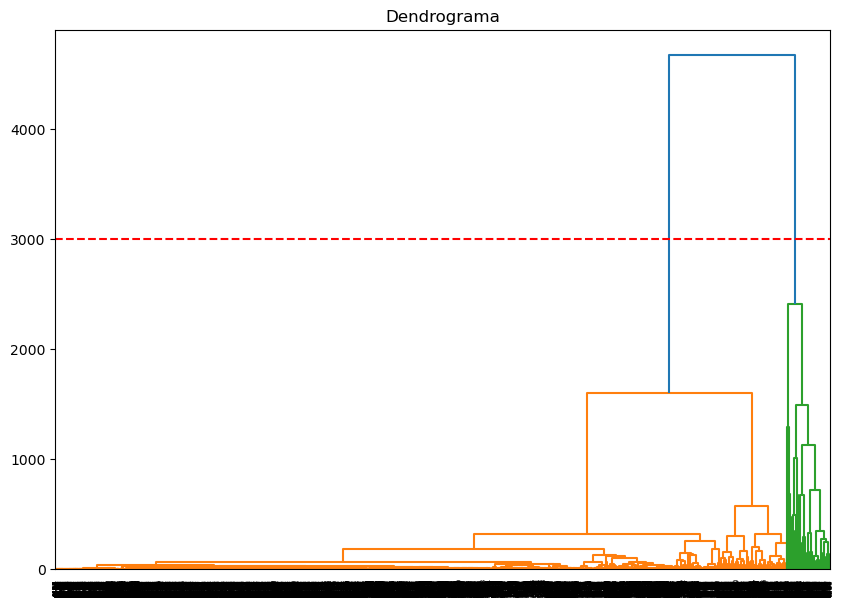

In [43]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma")  
dend = shc.dendrogram(shc.linkage(XkmT, method='ward'))
plt.axhline(y=3000, color='r', linestyle='--')
plt.show()

- Según el dendograma, la mayor distancia es entre el cluster azul y el naranja, distancia representada por la línea azul vertical más larga. Según la región horizontal por donde pasa esta línea, podemos usar 3 clusters como máximo y 2 cómo mínimo. Usaré 2 clusters que sería el mínimo. 

In [44]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(XkmT)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [45]:
labels = cluster.labels_
correct_labels = sum(ykm == labels)
print("Resultado: %d de %d muestras han sido correctamente etiquetadas." % (correct_labels, ykm.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(ykm.size)))

Resultado: 4240 de 6997 muestras han sido correctamente etiquetadas.
Accuracy score: 0.61


- Con el modelo de clustering jerárquico aglomerativo con k = 2 óptima, obtengo un resultado similar de 61% de exactitud que con el modelo Kmeans con k=3, también óptima.  

In [46]:
cluster.fit_predict(XkmT)
cluster_label = cluster.labels_

In [47]:
hcluster_df = pd.DataFrame(Xkm)
hcluster_df['Hcluster'] = cluster_label
hcluster_df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,KMeans_Clusters,Hcluster
0,3,529,512,262,432,92,3,1,1,0,0,1
1,1,150,0,0,150,0,0,0,0,0,1,1
2,3,227,236,57,204,21,1,1,0,0,1,1
3,1,111,0,0,111,0,0,0,0,0,1,1
4,1,213,0,0,204,9,0,0,0,0,1,1


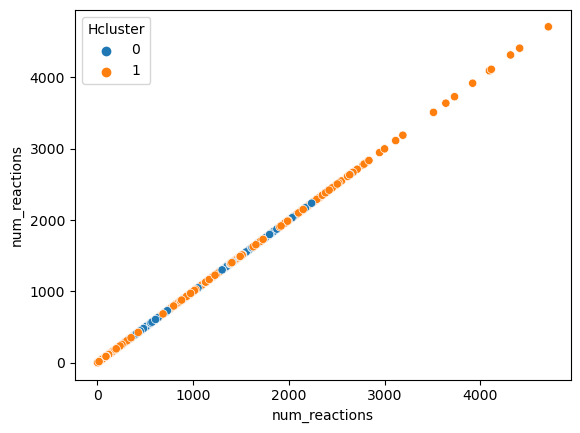

In [48]:
sns.scatterplot(x=hcluster_df['num_reactions'],y=hcluster_df['num_reactions'],hue='Hcluster',data=hcluster_df)
plt.show()

- Las observaciones de cada variable están clasificadas en uno de los dos clusters.  

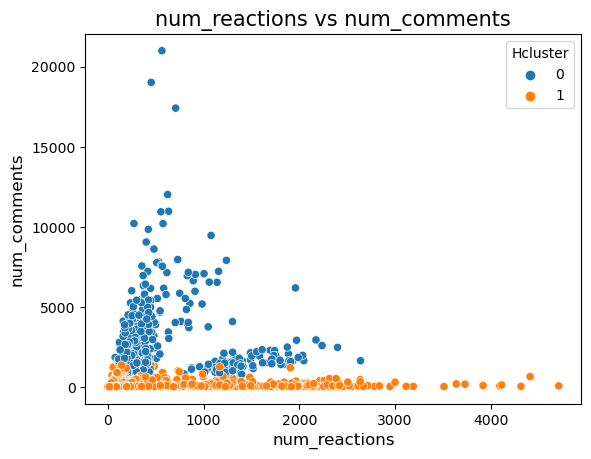

In [49]:
sns.scatterplot(x=hcluster_df['num_reactions'],y=hcluster_df['num_comments'],hue='Hcluster',data=hcluster_df)
plt.title("num_reactions vs num_comments", fontsize=15)
plt.xlabel("num_reactions", fontsize=12)
plt.ylabel("num_comments", fontsize=12)
plt.show()

- Para cada par de variables (aquí num_comments y num_reactions) podemos observar como están clasificadas en el clutser 0 o en el cluster 1. 

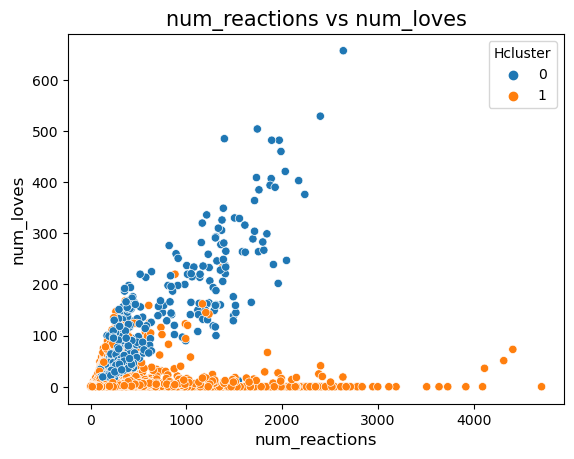

In [50]:
sns.scatterplot(x=hcluster_df['num_reactions'],y=hcluster_df['num_loves'],hue='Hcluster',data=hcluster_df)
plt.title("num_reactions vs num_loves", fontsize=15)
plt.xlabel("num_reactions", fontsize=12)
plt.ylabel("num_loves", fontsize=12)
plt.show()

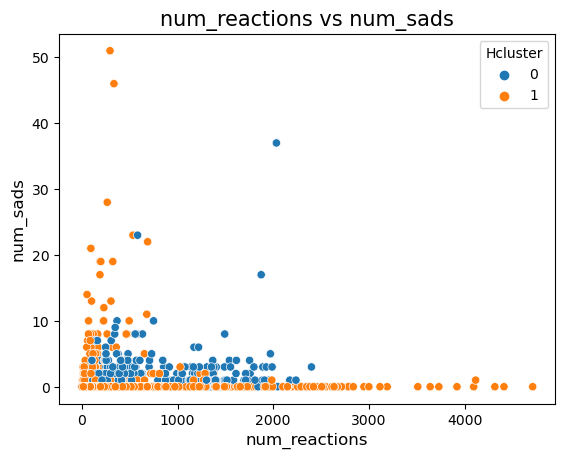

In [51]:
sns.scatterplot(x=hcluster_df['num_reactions'],y=hcluster_df['num_sads'],hue='Hcluster',data=hcluster_df)
plt.title("num_reactions vs num_sads", fontsize=15)
plt.xlabel("num_reactions", fontsize=12)
plt.ylabel("num_sads", fontsize=12)
plt.show()

- Las variables están bien agrupadas dentro de los clusters 0 y 1 aunque en momentos se confunden.   
- Para poner nombres a los clusters, el cluster 0 sería reacciones medio bajas comentarios altos y el 1 de bajos comentarios. Al igual que el modelo Kmeans la mayoría de status provocan pocas reacciones, pero los status que provocan reacciones generan muchas de ellas.   
- A manera de **conclusión,** tanto el modelo kmeans como el de clustering jerárquico aglomerativo con las k óptimas me llevan a un resultado similar, una exactitud del 61%, la diferencia radica en que el modelo jerárquico lo hace con K = 2 y el kmean con k=3; es decir, el jerárquico es preferible ya que simplifioca el modelo y además requiere menos carga computacional. 

## Ejercicio 3
Uso de silhouette para calcular rendimiento

**Modelo kMeans**

In [52]:
kmeans2 = KMeans(n_clusters=2, random_state=0)
kmeans2.fit(XkmT)
kmeans2.fit_predict(XkmT)

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
kmeans3 = KMeans(n_clusters=3, random_state=0)
kmeans3.fit(XkmT)
kmeans3.fit_predict(XkmT)

array([0, 1, 1, ..., 1, 1, 1])

In [54]:
kmeans4 = KMeans(n_clusters=4, random_state=0)
kmeans4.fit(XkmT)
kmeans4.fit_predict(XkmT)

array([2, 0, 0, ..., 0, 0, 0])

In [55]:
kmeans5 = KMeans(n_clusters=5, random_state=0)
kmeans5.fit(XkmT)
kmeans5.fit_predict(XkmT)

array([3, 0, 0, ..., 0, 0, 0])

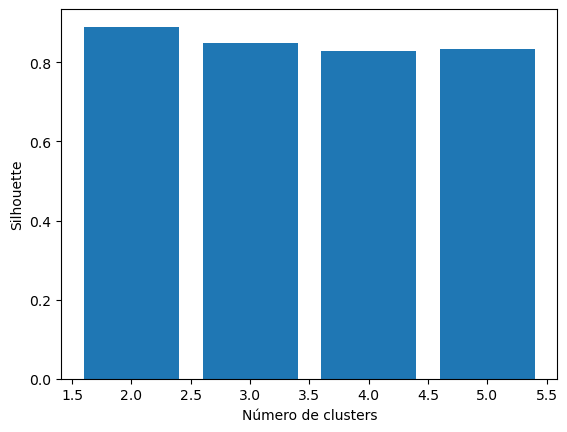

In [56]:
k = [2, 3, 4, 5]
 
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(XkmT, kmeans2.fit_predict(XkmT)))
silhouette_scores.append(
        silhouette_score(XkmT, kmeans3.fit_predict(XkmT)))
silhouette_scores.append(
        silhouette_score(XkmT, kmeans4.fit_predict(XkmT)))
silhouette_scores.append(
        silhouette_score(XkmT, kmeans5.fit_predict(XkmT)))
 
plt.bar(k, silhouette_scores)
plt.xlabel('Número de clusters', fontsize = 10)
plt.ylabel('Silhouette', fontsize = 10)
plt.show()

In [57]:
SC2 = metrics.silhouette_score(XkmT, kmeans2.fit_predict(XkmT))
SC3 = metrics.silhouette_score(XkmT, kmeans3.fit_predict(XkmT))
SC4 = metrics.silhouette_score(XkmT, kmeans4.fit_predict(XkmT))
SC5 = metrics.silhouette_score(XkmT, kmeans5.fit_predict(XkmT))
print ("El silhouette kmeans con k=2 es",round((SC2),4))
print ("El silhouette kmeans con k=3 es",round((SC3),4))
print ("El silhouette kmeans con k=4 es",round((SC4),4))
print ("El silhouette kmeans con k=5 es",round((SC5),4))

El silhouette kmeans con k=2 es 0.8903
El silhouette kmeans con k=3 es 0.8484
El silhouette kmeans con k=4 es 0.8286
El silhouette kmeans con k=5 es 0.8349


- Los cuatro modelos tienen silhouette alta, los puntos de datos son compactos dentro de sus clusters y están lejos de otros clusters. 
- La silhouette más alta es con k=2 mientras que con el método Elbow es k=3. El modelo con k=2 arroja una exactiud del 1% y con k=3 del 61%, al parecer silhouette no es la medida más efectiva para este modelo. 

**Modelo Clustering Jerárquico**

In [58]:
cluster2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster2.fit_predict(XkmT)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [59]:
cluster3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster3.fit_predict(XkmT)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
cluster4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster4.fit_predict(XkmT)

array([1, 3, 3, ..., 3, 3, 3], dtype=int64)

In [61]:
cluster5 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster5.fit_predict(XkmT)

array([4, 3, 3, ..., 3, 3, 3], dtype=int64)

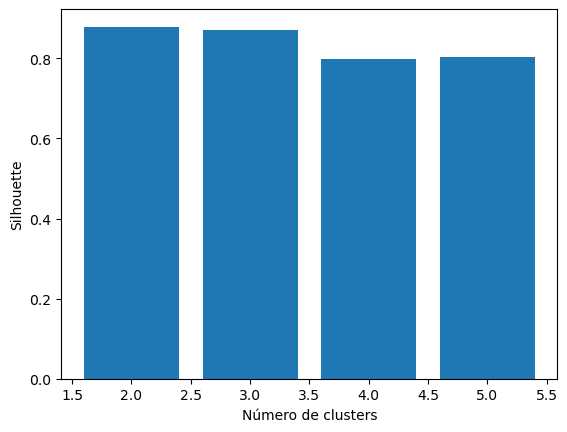

In [62]:
silhouette_scores2 = []
silhouette_scores2.append(
        silhouette_score(XkmT, cluster2.fit_predict(XkmT)))
silhouette_scores2.append(
        silhouette_score(XkmT, cluster3.fit_predict(XkmT)))
silhouette_scores2.append(
        silhouette_score(XkmT, cluster4.fit_predict(XkmT)))
silhouette_scores2.append(
        silhouette_score(XkmT, cluster5.fit_predict(XkmT)))

plt.bar(k, silhouette_scores2)
plt.xlabel('Número de clusters', fontsize = 10)
plt.ylabel('Silhouette', fontsize = 10)
plt.show()

In [63]:
SCJ2 = metrics.silhouette_score(XkmT, cluster2.fit_predict(XkmT))
SCJ3 = metrics.silhouette_score(XkmT, cluster3.fit_predict(XkmT))
SCJ4 = metrics.silhouette_score(XkmT, cluster4.fit_predict(XkmT))
SCJ5 = metrics.silhouette_score(XkmT, cluster5.fit_predict(XkmT))
print ("El silhouette del clustering jerárquico con k=2 es",round((SCJ2),4))
print ("El silhouette del clustering jerárquico con k=3 es",round((SCJ3),4))
print ("El silhouette del clustering jerárquico con k=4 es",round((SCJ4),4))
print ("El silhouette del clustering jerárquico con k=5 es",round((SCJ5),4))

El silhouette del clustering jerárquico con k=2 es 0.8792
El silhouette del clustering jerárquico con k=3 es 0.8711
El silhouette del clustering jerárquico con k=4 es 0.7991
El silhouette del clustering jerárquico con k=5 es 0.8038


- Nuevamente todos los modelos presentan un silhouette alto.  
- Al igual que el silhouette del Kmeans, el mejor silhouette del clustering jerárquico es con k=2. En este caso, el análisis silhouette y el método Elbow coinciden, el modelo con con k=2 arroja una exactitud del 61%, la más alta posile. 
- Finalmente, de los modelos análisados mediante silhouette y Elbow, el modelo de clustering jerárquico acumulativo con k=2 es el que tiene la mayor exactitud con el menor uso de recursos. 